In [5]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [7]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [8]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                    "price_change_percentage_1y"]]
)

In [10]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d",
                                                      "price_change_percentage_14d", "price_change_percentage_30d",
                                                      "price_change_percentage_60d", "price_change_percentage_200d",
                                                      "price_change_percentage_1y"])

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the 'coin_id' column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

In [12]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_market_data_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [16]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(market_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [18]:
# Create a copy of the DataFrame
df_market_data_scaled_k4 = df_market_data_scaled.copy()
df_market_data_scaled_k4.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [19]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_k4['MarketCluster'] = market_clusters

# Display sample data
df_market_data_scaled_k4.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,MarketCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [20]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_scaled_k4.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="MarketCluster",
    hover_cols = ["coin_id"], 
    title = "Scatter Plot by Market Segment - k=4"
)

:NdOverlay   [MarketCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
markets_pca_data = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
markets_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [24]:
total_explained_variance = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895

In [25]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(markets_pca_data, columns=['PC1','PC2','PC3'])

# Copy the crypto names from the original data
df_market_data_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index('coin_id')

# Display sample data
df_market_data_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [26]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

In [27]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(df_market_data_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [30]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [31]:
# Fit the K-Means model using the PCA data
model.fit(df_market_data_pca)

c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjyon\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_clusters = model.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(market_clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [33]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_predictions = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_predictions['MarketCluster'] = market_clusters

# Display sample data
df_market_data_pca_predictions.head()

,PC1,PC2,PC3,MarketCluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="MarketCluster",
    title = "Scatter Plot by Market Segment - PCA=3"
)

:NdOverlay   [MarketCluster]
   :Scatter   [PC1]   (PC2)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

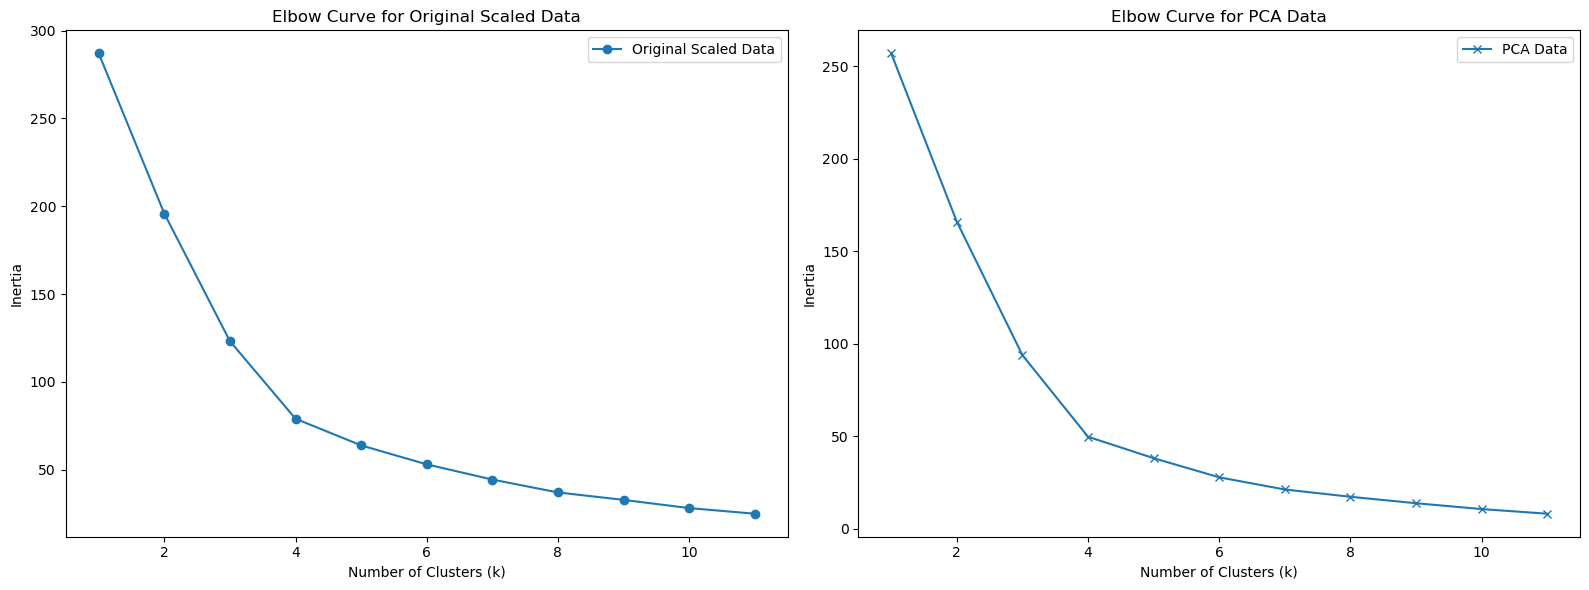

In [35]:
import matplotlib.pyplot as plt

# Composite plot to contrast the Elbow curves
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Elbow curve for the original scaled data
ax1.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Scaled Data')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Curve for Original Scaled Data')
ax1.legend()

# Plot the Elbow curve for the PCA data
ax2.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='x', label='PCA Data')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Curve for PCA Data')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

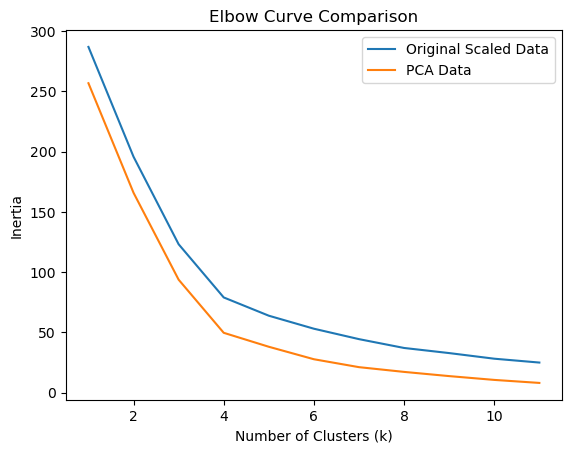

In [56]:
# Plot the elbow curve for original data
plt.plot(df_elbow['k'], df_elbow['inertia'], label='Original Scaled Data')

# Plot the elbow curve for PCA data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], label='PCA Data')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.legend()

# Show the plot
plt.show()

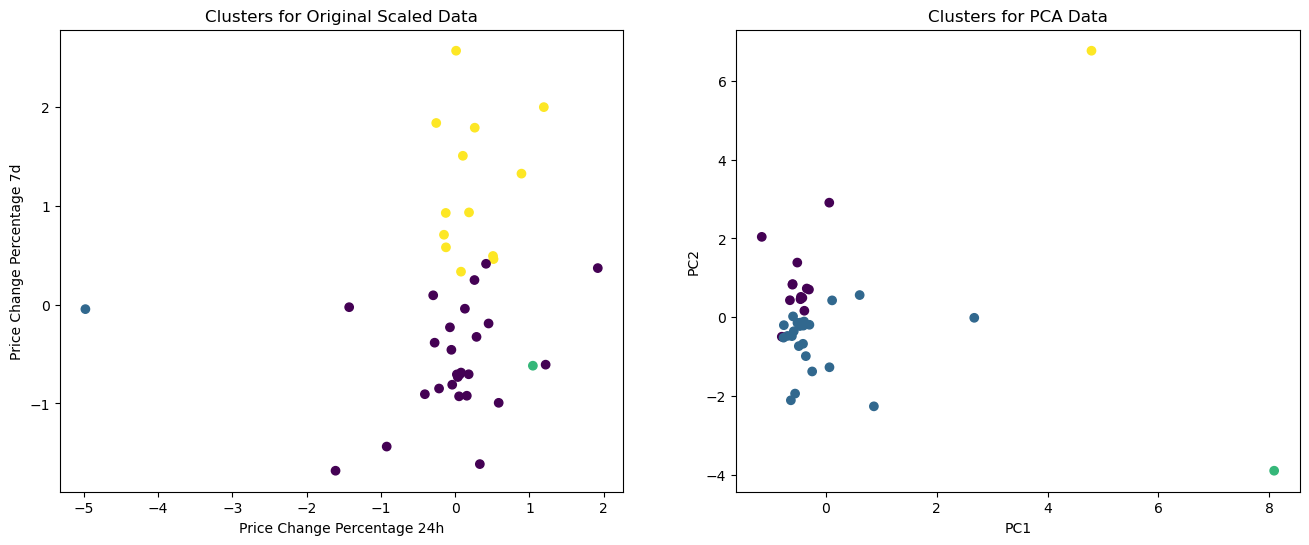

In [36]:
# Composite plot to contrast the clusters
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the clusters for the original scaled data
ax1.scatter(df_market_data_scaled['price_change_percentage_24h'],
            df_market_data_scaled['price_change_percentage_7d'],
            c=df_market_data_scaled_k4['MarketCluster'])
ax1.set_xlabel('Price Change Percentage 24h')
ax1.set_ylabel('Price Change Percentage 7d')
ax1.set_title('Clusters for Original Scaled Data')

# Plot the clusters for the PCA data
ax2.scatter(df_market_data_pca_predictions['PC1'],
            df_market_data_pca_predictions['PC2'],
            c=df_market_data_pca_predictions['MarketCluster'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Clusters for PCA Data')

# Show the plots
plt.show()

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** We can conclude that we can use less features and get a similar performance to the original model since we can clearly identify four clusters.